[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/frdrck/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/frdrck/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /Users/frdrck/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/frdrck/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                    id      conversation_id               created_at  \
0  1559350206201831424  1559164894334914561  2022-08-16 01:23:55 UTC   
1  1559350194780741632  1559059744517566464  2022-08-16 01:23:52 UTC   
2  1559350190150103042  1559350190150103042  2022-08-16 01:23:51 UTC   
3  1559350188485009408  1559045429831933952  2022-08-16 01:23:50 UTC   
4  1559350170457964547  1553919596280913920  2022-08-16 01:23:46 UTC   

         date      time  timezone              user_id         username  \
0  2022-08-16  01:23:55         0   788934038736121856        ezgoingui   
1  2022-08-16  01:23:52         0  1278755935918395393  neoliberalsh1ll   
2  2022-08-16  01:23:51         0             53003701      sillymickel   
3  2022-08-16  01:23:50         0            218734395       newsmatt57   
4  2022-08-16  01:23:46         0             75039102   sugarandspicer   

            name place  ... source user_rt_id user_rt retweet_id  \
0     omar evans   NaN  ...    NaN        NaN   

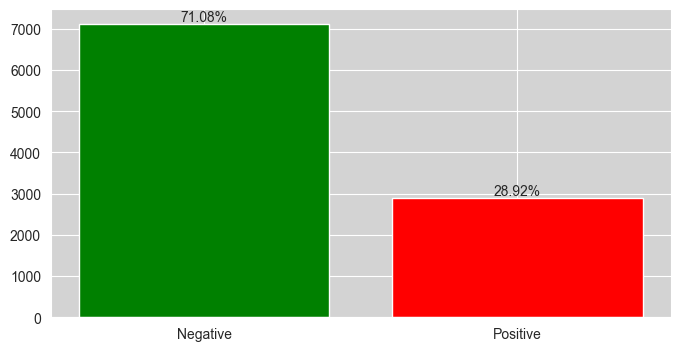

[==================================================] 100.0% 376.1/376.1MB downloaded
Epoch 1/10


2024-01-23 23:28:43.127851: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


8/8 [==============================] - 7s 777ms/step - loss: 0.6782 - accuracy: 0.7024 - val_loss: 0.6509 - val_accuracy: 0.7106
Epoch 2/10
8/8 [==============================] - 6s 818ms/step - loss: 0.6217 - accuracy: 0.7108 - val_loss: 0.6008 - val_accuracy: 0.7106
Epoch 3/10
8/8 [==============================] - 7s 824ms/step - loss: 0.6038 - accuracy: 0.7108 - val_loss: 0.6034 - val_accuracy: 0.7106
Epoch 4/10
8/8 [==============================] - 6s 820ms/step - loss: 0.6020 - accuracy: 0.7108 - val_loss: 0.6022 - val_accuracy: 0.7106
Epoch 5/10
63/63 [==============================] - 2s 32ms/step - loss: 0.6016 - accuracy: 0.7106

Test accuracy: 71.06%


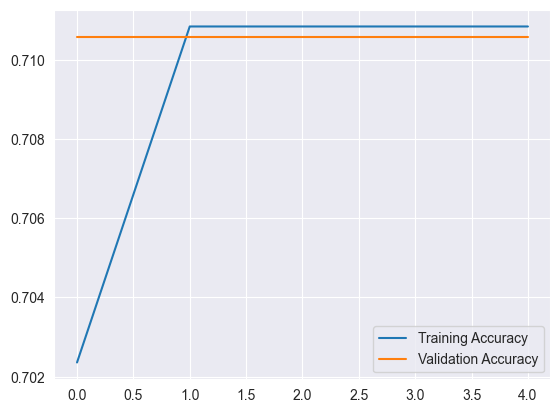

In [4]:
import nltk
nltk.download('vader_lexicon')
# Import necessary libraries
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
import nltk
# Download VADER lexicon
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding
from keras.callbacks import EarlyStopping
import gensim.downloader as api
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from keras.layers import SpatialDropout1D, LSTM, Dense
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# i. Collect a dataset of tweets and label them as positive or negative sentiment.
url = "https://raw.githubusercontent.com/deepakmoud/datasets-for-experiment/main/filename%202.csv"
df = pd.read_csv(url)

# ii. Perform text preprocessing on the collected tweets
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')

def clean_tweets(text, stem=False):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # Remove mentions
    text = re.sub(r'#', '', text)  # Remove hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove non-alphabetic characters
    text = text.lower().strip()  # Convert to lowercase and remove leading/trailing whitespaces

    tokens = []
    for token in word_tokenize(text):
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

df['cleaned_tweet'] = df['tweet'].apply(lambda x: clean_tweets(x, stem=True))

# iii. Implement Word2Vec or GloVe embeddings
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(df['cleaned_tweet'])
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(df['cleaned_tweet'])
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

# Print the processed DataFrame
print(df.head(5))
from nltk.sentiment import SentimentIntensityAnalyzer
# Initializing the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()
# Function to classify sentiment
def classify_sentiment(text):
    sentiment_score = sia.polarity_scores(text)['compound']
    return 'Positive' if sentiment_score >= 0.05 else 'Negative'

df['sentiment'] = df['tweet'].apply(classify_sentiment)
print(df.head())
import matplotlib.pyplot as plt
# DataFrame and it has a 'sentiment' column with categorical values
distribution = df.sentiment.value_counts()
plt.figure(figsize=(8,4))

# Set different colors for each bar
colors = ['green', 'red']

# Change the background color
plt.gca().set_facecolor('lightgray')

bars = plt.bar(distribution.index, distribution.values, color=colors[:len(distribution.index)])

# Adding percentage labels on top of the bars
total = distribution.sum()  # Total sum for calculating percentages
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{100 * yval/total:.2f}%', ha='center', va='bottom')

plt.show()

# iv. Split the dataset into training and testing sets
X = padded_sequences
y = df['sentiment']  # Assuming 'sentiment' is a column containing 'Positive' or 'Negative'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load GloVe embeddings
embedding_dim = 300
glove_model = api.load("glove-wiki-gigaword-300")

embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))

for word, i in word_index.items():
    if word in glove_model:
        embedding_matrix[i] = glove_model[word]

# Encode the 'sentiment' column using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert to one-hot encoding using to_categorical
y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)

# Model
model = Sequential()
model.add(Embedding(len(word_index) + 1, embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=False))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))  # Two units for binary classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_categorical, epochs=10, validation_data=(X_test, y_test_categorical), batch_size=1024, callbacks=[EarlyStopping(patience=3)])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_categorical)
print(f'\nTest accuracy: {accuracy * 100:.2f}%')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [15]:
# Calculate metrics with zero_division parameter set to 'warn'
accuracy = accuracy_score(y_test_labels, y_pred) * 100
precision = precision_score(y_test_labels, y_pred, zero_division=1) * 100
recall = recall_score(y_test_labels, y_pred, zero_division=1) * 100
f1 = f1_score(y_test_labels, y_pred, zero_division=1) * 100

print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1-Score: {f1:.2f}%")

# Display detailed classification report
print(classification_report(y_test_labels, y_pred, zero_division=1))

Accuracy: 71.06%
Precision: 100.00%
Recall: 0.00%
F1-Score: 0.00%
              precision    recall  f1-score   support

           0       0.71      1.00      0.83      1424
           1       1.00      0.00      0.00       580

    accuracy                           0.71      2004
   macro avg       0.86      0.50      0.42      2004
weighted avg       0.79      0.71      0.59      2004

